In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
url = 'https://services1.arcgis.com/CY1LXxl9zlJeBuRZ/arcgis/rest/services/Florida_COVID19_Cases/FeatureServer/0/query?where=%20(County_1%20%3D%20%27DUVAL%27%20OR%20County_1%20%3D%20%27BAKER%27%20OR%20County_1%20%3D%20%27CLAY%27%20OR%20County_1%20%3D%20%27NASSAU%27%20OR%20County_1%20%3D%20%27ST.%20JOHNS%27)%20&outFields=OBJECTID,DEPCODE,COUNTY,County_1,PUIsTotal,Age_0_4,Age_5_14,Age_15_24,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65_74,Age_75_84,Age_85plus,Age_Unkn,PUIAgeRange,PUIAgeMedian,PUIFemale,PUIMale,PUISexUnkn,PUIFLRes,PUINotFLRes,PUIFLResOut,PUIContNo,PUIContUnkn,PUIAgeAvrg,PUITravelNo,PUITravelYes,TPositive,TNegative,TInconc,TPending,T_Total_Res,T_LabPrivate_Res,T_LabDOH_Res,T_LabPrivate_NonRes,T_LabDOH_NonRes,C_Female,C_Male,C_SexUnkn,C_AllResTypes,C_Age_0_4,C_Age_5_14,C_Age_15_24,C_Age_25_34,C_Age_35_44,C_Age_45_54,C_Age_55_64,C_Age_65_74,C_Age_75_84,C_Age_85plus,C_Age_Unkn,C_AgeRange,C_AgeMedian,C_RaceWhite,C_RaceBlack,C_RaceOther,C_RaceUnknown,C_HispanicYES,C_HispanicNO,C_HispanicUnk,C_EDYes_Res,C_EDYes_NonRes,C_HospYes_Res,C_HospYes_NonRes,C_NonResDeaths,C_FLResDeaths,CasesAll,C_Men,C_Women,C_FLRes,C_NotFLRes,C_FLResOut,T_NegRes,T_NegNotFLRes,T_total,T_negative,T_positive,Deaths,EverMon,MonNow,GlobalID,NewPos,NewNeg,NewTested,NewPercPos,MedianAge&returnGeometry=false&outSR=4326&f=json'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data, 'features')
df.head()

,attributes.OBJECTID,attributes.DEPCODE,attributes.COUNTY,attributes.County_1,attributes.PUIsTotal,attributes.Age_0_4,attributes.Age_5_14,attributes.Age_15_24,attributes.Age_25_34,attributes.Age_35_44,...,attributes.T_positive,attributes.Deaths,attributes.EverMon,attributes.MonNow,attributes.GlobalID,attributes.NewPos,attributes.NewNeg,attributes.NewTested,attributes.NewPercPos,attributes.MedianAge
0,17,2,003,Baker,2110,45,50,239,405,404,...,1132,4,732,731,393e3bc9-079e-4ad6-9162-d77ee72feb59,14,73,87,0.160920,40
1,22,10,019,Clay,12038,183,424,1282,1493,1770,...,3759,73,2678,2644,d8b9952e-371d-460f-96ae-4666bdb4ad84,31,461,492,0.063008,44
2,36,16,031,Duval,72971,1244,2293,8335,13140,10983,...,25879,246,6374,6260,e178a8cf-16fc-449e-abf2-a69cfad303d5,143,2808,2951,0.048458,38
3,54,45,089,Nassau,4938,73,129,539,558,609,...,1533,16,1467,1461,4d22d524-13f7-4497-919b-bc6894006209,11,161,172,0.063953,45
4,67,55,109,St. Johns,14672,197,504,1744,1668,2144,...,4219,54,3619,3579,8c0a9f2c-c490-4bbc-9e26-85b6f4aefeb1,24,501,525,0.045714,41


In [3]:
column_names = []
for column in df.columns:
    column_names.append(column[11:])
df.columns = column_names
df

,OBJECTID,DEPCODE,COUNTY,County_1,PUIsTotal,Age_0_4,Age_5_14,Age_15_24,Age_25_34,Age_35_44,...,T_positive,Deaths,EverMon,MonNow,GlobalID,NewPos,NewNeg,NewTested,NewPercPos,MedianAge
0,17,2,003,Baker,2110,45,50,239,405,404,...,1132,4,732,731,393e3bc9-079e-4ad6-9162-d77ee72feb59,14,73,87,0.160920,40
1,22,10,019,Clay,12038,183,424,1282,1493,1770,...,3759,73,2678,2644,d8b9952e-371d-460f-96ae-4666bdb4ad84,31,461,492,0.063008,44
2,36,16,031,Duval,72971,1244,2293,8335,13140,10983,...,25879,246,6374,6260,e178a8cf-16fc-449e-abf2-a69cfad303d5,143,2808,2951,0.048458,38
3,54,45,089,Nassau,4938,73,129,539,558,609,...,1533,16,1467,1461,4d22d524-13f7-4497-919b-bc6894006209,11,161,172,0.063953,45
4,67,55,109,St. Johns,14672,197,504,1744,1668,2144,...,4219,54,3619,3579,8c0a9f2c-c490-4bbc-9e26-85b6f4aefeb1,24,501,525,0.045714,41


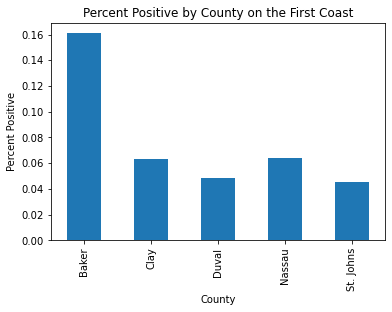

In [4]:
df.plot(kind='bar',x='County_1',y='NewPercPos', title='Percent Positive by County on the First Coast', legend=None)
plt.ylabel('Percent Positive')
plt.xlabel('County')
plt.show()